In [262]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from reservoirpy.nodes import Reservoir, Ridge, Input
from reservoirpy.utils import verbosity
from reservoirpy.datasets import lorenz

from scipy import integrate


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 7]

Lorenz Model

In [142]:
len_data=5000
data=lorenz(len_data,h=0.01,x0=[2,2,2])
pert=lorenz(len_data,h=0.01,x0=[2+0.01,2,2])

In [151]:
dt = 0.01
T = 50
t = np.arange(dt,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28
n = 3
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


Evaluate correlation

In [116]:
data.shape

(5000, 3)

In [27]:
np.cov(data[:,0])

array(20.10263053)

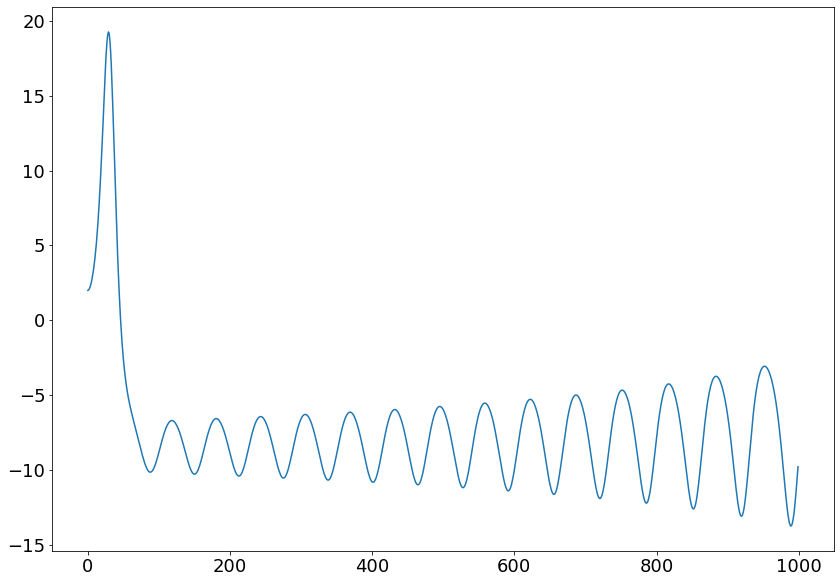

In [28]:
plt.plot(data[:,0])

In [29]:
x = data[:,0]

y = data[:,1]

X = np.stack((x, y), axis=0)

In [31]:
X.shape

(2, 1000)

In [36]:
np.cov(X[:,4])

array(1.49431782)

In [282]:
data.shape

(5000, 3)

In [301]:
np.corrcoef(data[5,0].T,data[5,0].T, rowvar=True)

array([[nan, nan],
       [nan, nan]])

In [39]:
def time_correlation(data, window_size):
    num_points, num_variables = data.shape
    num_windows = num_points - window_size + 1
    correlations = np.zeros((num_windows, num_variables, num_variables))

    for i in range(num_windows):
        window_data = data[i:i+window_size]
        window_correlation = np.corrcoef(window_data, rowvar=False)
        correlations[i] = window_correlation

    return correlations

In [139]:
from statsmodels.tsa import stattools
# x = 1-D array
# Yield normalized autocorrelation function of number lags
autocorr = stattools.acf( data[:,0] ,nlags=len(data)/2,fft=False,bartlett_confint=False)

# Get autocorrelation coefficient at lag = 1
autocorr_coeff = autocorr[2]

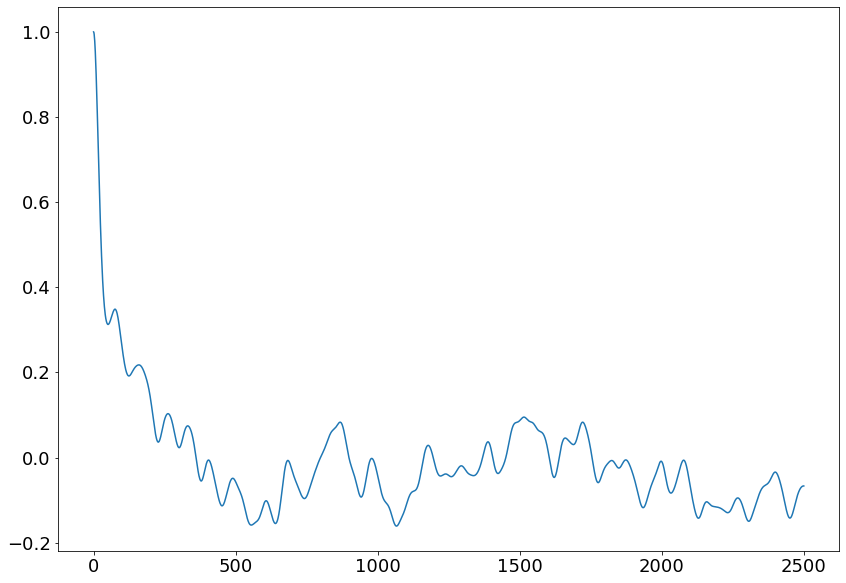

In [140]:
plt.plot(autocorr)

In [143]:
fot t in range(len(data)):
    Rxx=np.mean(data[t,0]-pert[t,0])

0.19630928763095018

## **Response Function**

https://journals.aps.org/pre/pdf/10.1103/PhysRevE.104.L032101

In [398]:
T=1
dt=0.001
t = np.arange(dt,T+dt,dt)
dx=0.1

x0_rand      = np.random.uniform(-100, 100, size=(3,10000)) # 100 CI - starting points 

x0_rand_pert = np.array([x0_rand[0]+dx,x0_rand[1],x0_rand[2]])

sols = []
pert = []

for i in range(10000):
    sols.append(integrate.odeint(lorenz_deriv, x0_rand[:,i],t))
    pert.append(integrate.odeint(lorenz_deriv, x0_rand_pert[:,i], t))
Sols=np.asarray(sols)
Pert=np.asarray(pert)

In [315]:
Sols=Sols[:,:,:]
Pert=Pert[:,:,:]

In [316]:
Sols[:,:,0].shape

(100, 1000)

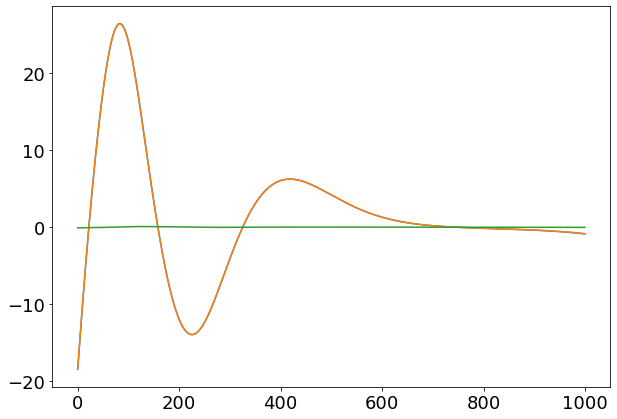

In [399]:
plt.plot(Sols[0,:,0])
plt.plot(Pert[0,:,0])
plt.plot(Sols[0,:,0]-Pert[0,:,0])
plt.show()

In [400]:
dx=((Sols[:,:,0]-Pert[:,:,0]).mean(axis=0))

In [382]:
dx.shape

(1000,)

In [406]:
Rxx=dx/dx[0]


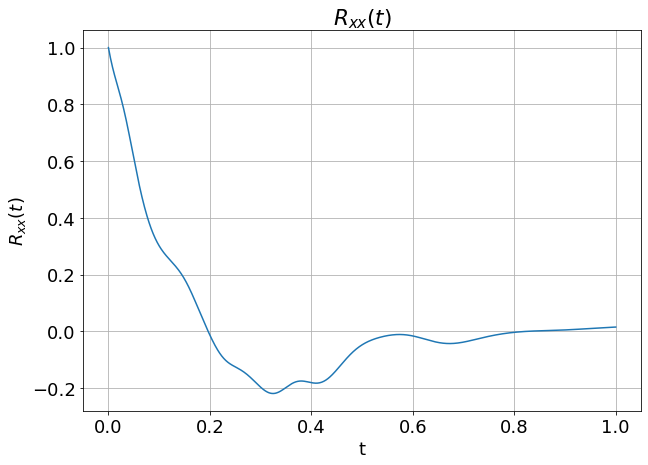

In [424]:
plt.plot(np.linspace(0,1,1000),Rxx)
plt.title(r'$R_{xx}(t)$')
plt.xlabel("t")
plt.ylabel(r'$R_{xx}(t)$')
plt.grid()
plt.show()


In [414]:
T=1
dt=0.001
t = np.arange(dt,T+dt,dt)
dy=0.1

#x0_rand      = np.random.uniform(-100, 100, size=(3,10000)) # 100 CI - starting points 

x0_rand_pert = np.array([x0_rand[0],x0_rand[1]+dy,x0_rand[2]])

#sols = []
pert_y = []

for i in range(10000):
    #sols.append(integrate.odeint(lorenz_deriv, x0_rand[:,i],t))
    pert_y.append(integrate.odeint(lorenz_deriv, x0_rand_pert[:,i], t))
#Sols=np.asarray(sols)
Pert_y=np.asarray(pert_y)

In [416]:
dx=((Sols[:,:,0]-Pert_y[:,:,0]).mean(axis=0))

In [417]:
dy=(Sols[:,:,1]-Pert_y[:,:,1]).mean(axis=0)

In [419]:
Rxy=dx/dy[0]

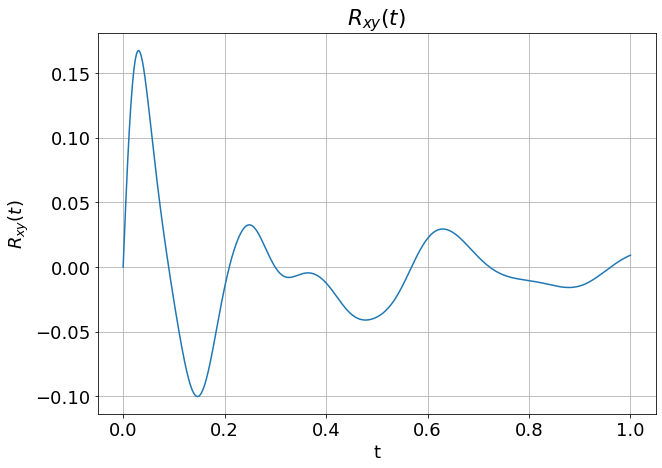

In [423]:
plt.plot(np.linspace(0,1,1000),Rxy)
plt.title(r'$R_{xy}(t)$')
plt.xlabel("t")
plt.ylabel(r'$R_{xy}(t)$')
plt.grid()
plt.show()